# Weather Forcast Time Series

### Importants Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv('ordered.csv' , index_col=0)

In [ ]:
data.index = pd.to_datetime(data['datetime'])
data.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2018-09-05 00:00:00,delhi,2018-09-05T00:00:00,78.8,78.8,77.0,94.23,0.0,0,NaN,NaN,...,1003.0,88.9,1.2,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999"
2018-09-05 01:00:00,delhi,2018-09-05T01:00:00,78.8,78.8,77.0,94.23,0.0,0,NaN,NaN,...,1004.0,88.9,1.2,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999"
2018-09-05 02:00:00,delhi,2018-09-05T02:00:00,78.9,78.9,76.7,93.26,0.0,0,NaN,NaN,...,1002.0,67.0,1.2,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"42182099999,VIDP,42181099999"
2018-09-05 03:00:00,delhi,2018-09-05T03:00:00,78.8,78.8,78.8,100.00,0.0,0,NaN,NaN,...,1003.0,88.9,1.2,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999"
2018-09-05 04:00:00,delhi,2018-09-05T04:00:00,78.8,78.8,78.8,100.00,0.0,0,NaN,NaN,...,1003.0,88.9,1.2,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"VIDP,42181099999"


In [ ]:
data.nunique()

name                    2
datetime            43152
temp                  723
feelslike             893
dew                   563
humidity             7504
precip                283
precipprob              2
preciptype              1
snow                    1
snowdepth               1
windgust              175
windspeed             205
winddir              1295
sealevelpressure      344
cloudcover            870
visibility             45
solarradiation       5815
solarenergy            39
uvindex                11
severerisk              6
conditions              7
icon                    8
stations               41
dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,43152.0,76.908799,14.835940,33.30,65.9000,79.30,87.80,117.400
feelslike,43152.0,80.194582,18.486146,29.40,65.9000,79.30,95.00,135.900
dew,43152.0,61.614966,12.517404,17.10,51.8000,60.10,73.40,86.000
humidity,43152.0,64.918320,23.434075,5.03,46.8075,67.14,84.51,100.000
precip,43152.0,0.004477,0.074797,0.00,0.0000,0.00,0.00,3.721
precipprob,43152.0,1.837690,13.431161,0.00,0.0000,0.00,0.00,100.000
snow,13704.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000
snowdepth,13782.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.000
windgust,14912.0,10.861850,6.588245,0.20,5.6000,9.40,15.00,53.000
windspeed,43152.0,4.454292,3.417571,0.00,1.3000,4.70,6.90,39.100


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

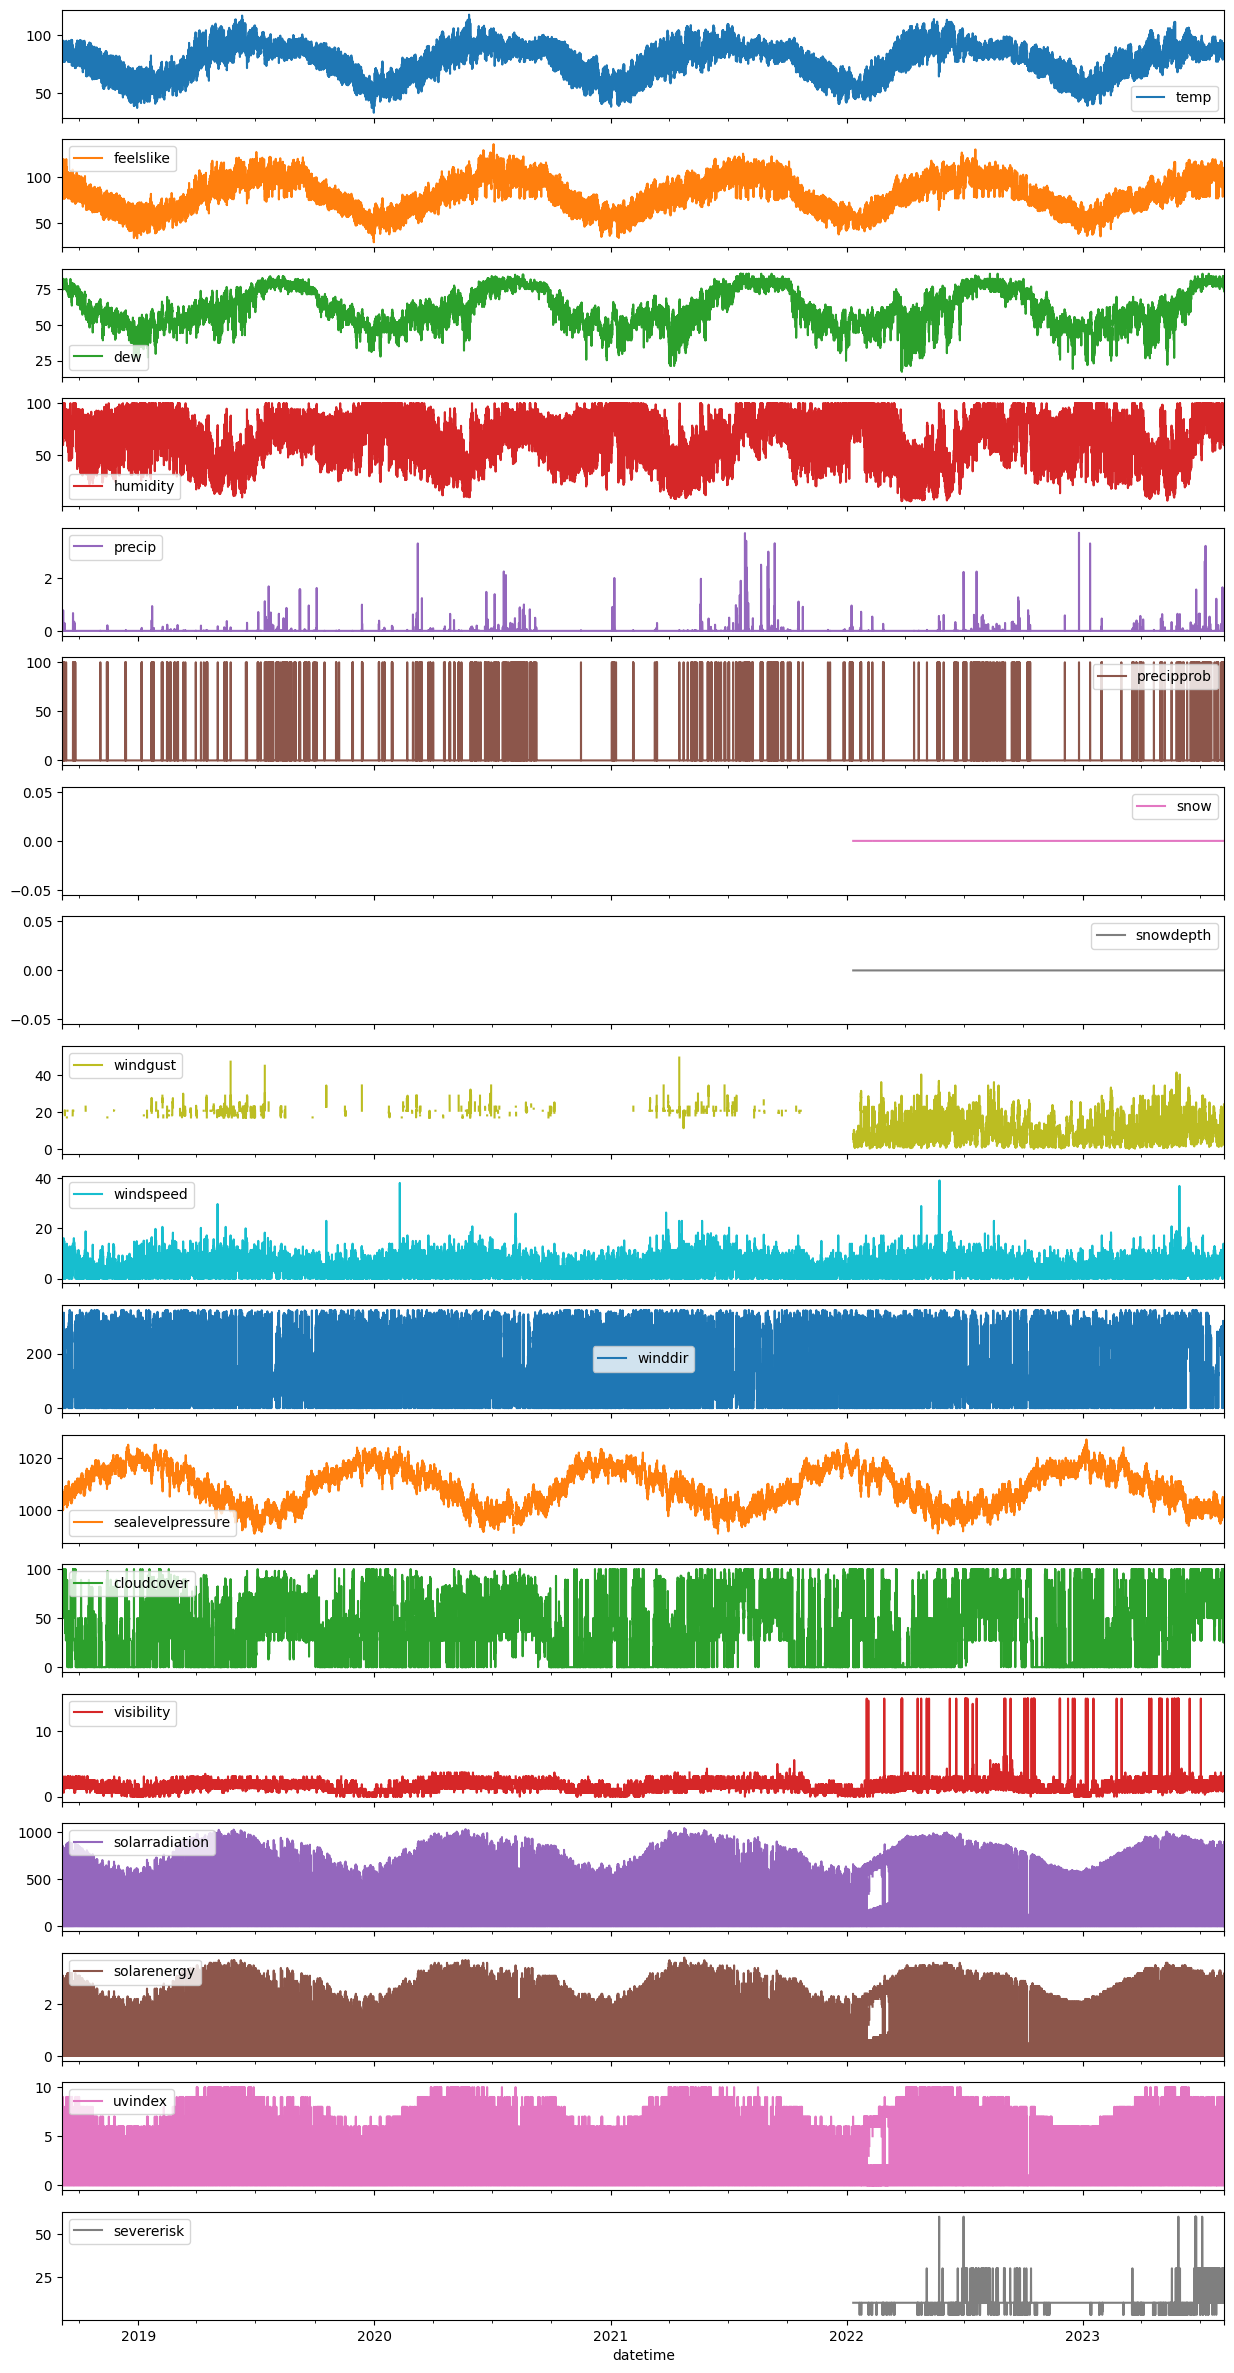

In [ ]:
data.plot(figsize=(15,30),subplots=True)

In [ ]:
df = data[['temp', 'feelslike', 'dew', 'humidity','windspeed' , 'winddir' , 'sealevelpressure' , 'cloudcover' , 'visibility' , 'uvindex']]

In [ ]:
df.head()

,temp,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex
datetime,,,,,,,,,,
2018-09-05 00:00:00,78.8,78.8,77.0,94.23,0.0,0.0,1003.0,88.9,1.2,0.0
2018-09-05 01:00:00,78.8,78.8,77.0,94.23,3.4,260.0,1004.0,88.9,1.2,0.0
2018-09-05 02:00:00,78.9,78.9,76.7,93.26,0.8,270.0,1002.0,67.0,1.2,0.0
2018-09-05 03:00:00,78.8,78.8,78.8,100.00,3.4,250.0,1003.0,88.9,1.2,0.0
2018-09-05 04:00:00,78.8,78.8,78.8,100.00,3.4,280.0,1003.0,88.9,1.2,0.0


array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'feelslike'}>,
        <Axes: title={'center': 'dew'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'winddir'}>],
       [<Axes: title={'center': 'sealevelpressure'}>,
        <Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'uvindex'}>, <Axes: >, <Axes: >]],
      dtype=object)

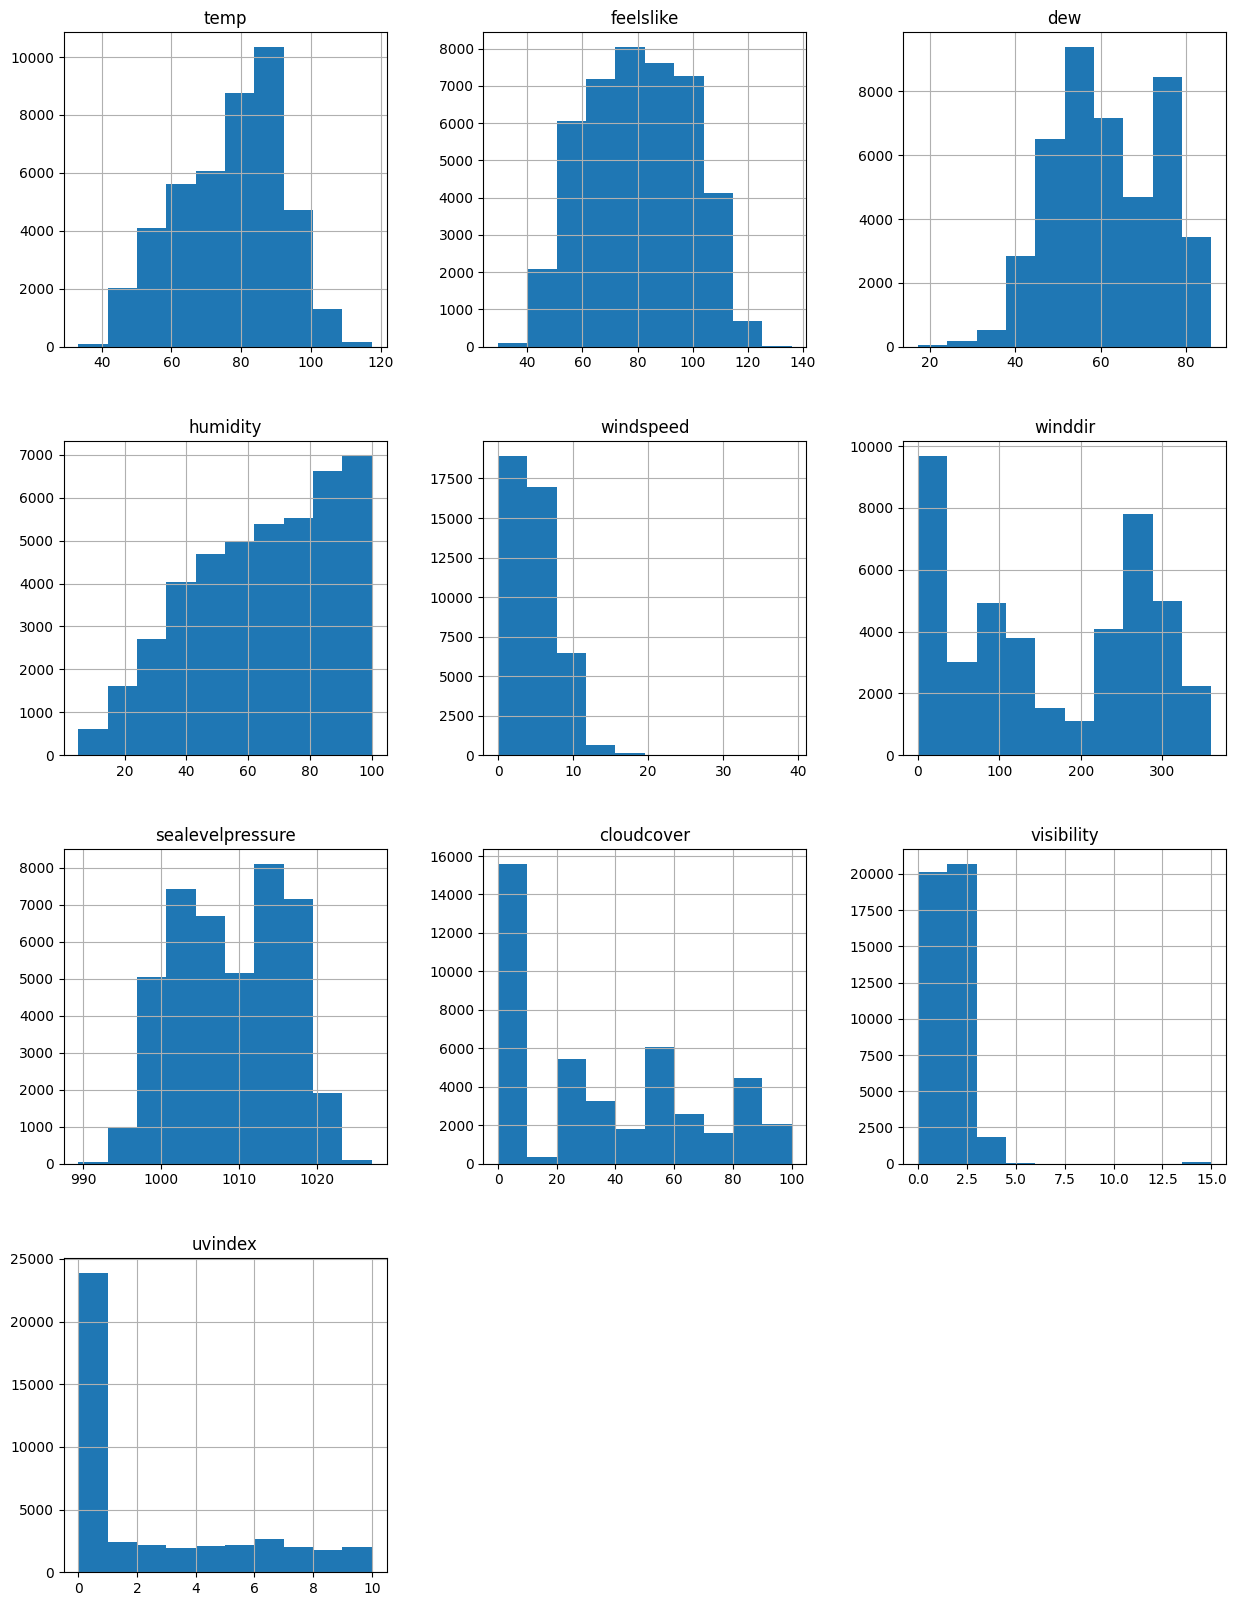

In [ ]:
df.hist(figsize = (15,20))

In [ ]:
df.isna().sum()

temp                  0
feelslike             0
dew                   0
humidity              0
windspeed             0
winddir               0
sealevelpressure    588
cloudcover            0
visibility          370
uvindex              77
dtype: int64

In [ ]:
df.nunique()

temp                 723
feelslike            893
dew                  563
humidity            7504
windspeed            205
winddir             1295
sealevelpressure     344
cloudcover           870
visibility            45
uvindex               11
dtype: int64

In [ ]:
df['sealevelpressure'].fillna( np.mean(df['sealevelpressure']),inplace = True)
df['visibility'].fillna( np.mean(df['visibility']),inplace = True)
df['uvindex'].fillna( df['uvindex'].value_counts().idxmax(),inplace = True)

<ipython-input-110-acc6ce371476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sealevelpressure'].fillna( np.mean(df['sealevelpressure']),inplace = True)
<ipython-input-110-acc6ce371476>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visibility'].fillna( np.mean(df['visibility']),inplace = True)
<ipython-input-110-acc6ce371476>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uvindex'].fillna( df['uvindex'].value_count

In [ ]:
df.isna().sum()

temp                0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
uvindex             0
dtype: int64

In [ ]:
df['dew'] = (df['dew'] - np.mean(df['dew'])) / np.std(df['dew'])
df['humidity'] = (df['humidity'] - np.mean(df['humidity'])) / np.std(df['humidity'])
df['winddir'] = np.cos(df['winddir'])
df['windspeed'] = (df['windspeed'] - np.mean(df['windspeed'])) / np.std(df['windspeed'])
df['cloudcover'] = (df['cloudcover'] - np.mean(df['cloudcover'])) / np.std(df['cloudcover'])
df['temp'] = (df['temp'] - np.mean(df['temp'])) / np.std(df['temp'])
df['sealevelpressure'] = (df['sealevelpressure'] - np.mean(df['sealevelpressure'])) / np.std(df['sealevelpressure'])
df['uvindex'] = df['uvindex']/10
df['visibility'] = (df['visibility'] - np.mean(df['visibility'])) / np.std(df['visibility'])


<ipython-input-112-afdc6d8fa6b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dew'] = (df['dew'] - np.mean(df['dew'])) / np.std(df['dew'])
<ipython-input-112-afdc6d8fa6b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['humidity'] = (df['humidity'] - np.mean(df['humidity'])) / np.std(df['humidity'])
<ipython-input-112-afdc6d8fa6b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
df['feelslike'] = (df['feelslike'] - np.mean(df['feelslike'])) / np.std(df['feelslike'])


<ipython-input-113-51b5c853b183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feelslike'] = (df['feelslike'] - np.mean(df['feelslike'])) / np.std(df['feelslike'])


In [ ]:
df.head()

,temp,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex
datetime,,,,,,,,,,
2018-09-05 00:00:00,0.127476,-0.075440,1.229106,1.250829,-1.303365,1.000000,-0.855299,1.621473,-0.462911,0.0
2018-09-05 01:00:00,0.127476,-0.075440,1.229106,1.250829,-0.308495,-0.730194,-0.711142,1.621473,-0.462911,0.0
2018-09-05 02:00:00,0.134216,-0.070031,1.205139,1.209436,-1.069278,0.984382,-0.999456,0.953624,-0.462911,0.0
2018-09-05 03:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,0.240988,-0.855299,1.621473,-0.462911,0.0
2018-09-05 04:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,-0.921740,-0.855299,1.621473,-0.462911,0.0


In [ ]:
df['seconds'] = df.index.map(pd.Timestamp.timestamp)
day = 60*60*24
year = 365.2425*day

df['Day sin'] = np.sin(df['seconds'] * (2* np.pi /day))
df['Day cos'] = np.cos(df['seconds'] * (2* np.pi /day))
df['Year sin'] = np.sin(df['seconds'] * (2* np.pi /year))
df['Year cos'] = np.cos(df['seconds'] * (2* np.pi /year))
df.head()

<ipython-input-115-99f367daa1eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seconds'] = df.index.map(pd.Timestamp.timestamp)
<ipython-input-115-99f367daa1eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(df['seconds'] * (2* np.pi /day))
<ipython-input-115-99f367daa1eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,temp,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex,seconds,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,,,,,,,,
2018-09-05 00:00:00,0.127476,-0.075440,1.229106,1.250829,-1.303365,1.000000,-0.855299,1.621473,-0.462911,0.0,1.536106e+09,-2.940619e-12,1.000000,-0.897332,-0.441357
2018-09-05 01:00:00,0.127476,-0.075440,1.229106,1.250829,-0.308495,-0.730194,-0.711142,1.621473,-0.462911,0.0,1.536109e+09,2.588190e-01,0.965926,-0.897648,-0.440713
2018-09-05 02:00:00,0.134216,-0.070031,1.205139,1.209436,-1.069278,0.984382,-0.999456,0.953624,-0.462911,0.0,1.536113e+09,5.000000e-01,0.866025,-0.897964,-0.440070
2018-09-05 03:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,0.240988,-0.855299,1.621473,-0.462911,0.0,1.536116e+09,7.071068e-01,0.707107,-0.898279,-0.439426
2018-09-05 04:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,-0.921740,-0.855299,1.621473,-0.462911,0.0,1.536120e+09,8.660254e-01,0.500000,-0.898593,-0.438782


In [ ]:
df.drop(['seconds', 'winddir' ],axis = 1, inplace = True)

<ipython-input-116-05b34e36f649>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['seconds', 'winddir' ],axis = 1, inplace = True)


In [ ]:
df.head()

,temp,feelslike,dew,humidity,windspeed,sealevelpressure,cloudcover,visibility,uvindex,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,,,,,,
2018-09-05 00:00:00,0.127476,-0.075440,1.229106,1.250829,-1.303365,-0.855299,1.621473,-0.462911,0.0,-2.940619e-12,1.000000,-0.897332,-0.441357
2018-09-05 01:00:00,0.127476,-0.075440,1.229106,1.250829,-0.308495,-0.711142,1.621473,-0.462911,0.0,2.588190e-01,0.965926,-0.897648,-0.440713
2018-09-05 02:00:00,0.134216,-0.070031,1.205139,1.209436,-1.069278,-0.999456,0.953624,-0.462911,0.0,5.000000e-01,0.866025,-0.897964,-0.440070
2018-09-05 03:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,-0.855299,1.621473,-0.462911,0.0,7.071068e-01,0.707107,-0.898279,-0.439426
2018-09-05 04:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,-0.855299,1.621473,-0.462911,0.0,8.660254e-01,0.500000,-0.898593,-0.438782


In [ ]:
def df_toXy(df , window_size = 5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][:9]
        y.append(label)
    return np.array(X) , np.array(y)

In [ ]:
X , y = df_toXy(df)

In [ ]:
X.shape

(43147, 5, 13)

In [ ]:
y.shape

(43147, 9)

In [ ]:
X_train , y_train = X[:38000] , y[:38000]
X_val , y_val = X[38000:40000] , y[38000:40000]
X_test , y_test = X[40000:] , y[40000:]

# Model for the forcast predication

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((5,13)),
    tf.keras.layers.Conv1D(128,3,1, padding = 'same'),
    tf.keras.layers.MaxPooling1D(strides= 1,padding = 'same'),
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.LSTM(32, return_sequences = False),
    tf.keras.layers.Dense(16 , 'relu'),
    tf.keras.layers.Dense(9 , 'linear')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 5, 128)            5120      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_8 (LSTM)               (None, 5, 64)             49408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                      

In [ ]:
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = ['mse'])

In [ ]:
history = model.fit(X_train , y_train ,
          epochs = 5,
          validation_data = (X_val  , y_val))

Epoch 1/5
1188/1188 [==============================] - 36s 25ms/step - loss: 0.1946 - mse: 0.1946 - val_loss: 0.2157 - val_mse: 0.2157
Epoch 2/5
1188/1188 [==============================] - 29s 24ms/step - loss: 0.1393 - mse: 0.1393 - val_loss: 0.1986 - val_mse: 0.1986
Epoch 3/5
1188/1188 [==============================] - 28s 24ms/step - loss: 0.1313 - mse: 0.1313 - val_loss: 0.2032 - val_mse: 0.2032
Epoch 4/5
1188/1188 [==============================] - 28s 23ms/step - loss: 0.1252 - mse: 0.1252 - val_loss: 0.1995 - val_mse: 0.1995
Epoch 5/5
1188/1188 [==============================] - 28s 23ms/step - loss: 0.1223 - mse: 0.1223 - val_loss: 0.1924 - val_mse: 0.1924


In [ ]:
def plot_predictions(model, X, y, columns,start=0, end=100):
  predictions = model.predict(X)
  plt.figure(figsize = (15,12))

  for i in range(0,9):
      plt.subplot(5,2,i+1)
      preds = predictions[:, i]
      actuals = y[:, i]
      df = pd.DataFrame(data={f'{columns[i]} Predictions': preds,
                          f'{columns[i]} Actuals':actuals,
                          })
      plt.plot(df[f'{columns[i]} Predictions'][start:end], label= f'{columns[i]} Predicted')
      plt.plot(df[f'{columns[i]} Actuals'][start:end], label = f'{columns[i]} Actual')
      plt.legend()
  return df[start:end]

99/99 [==============================] - 2s 6ms/step


,uvindex Predictions,uvindex Actuals
0,0.053767,0.0
1,0.045575,0.0
2,0.027689,0.0
3,0.023535,0.0
4,0.029754,0.0
...,...,...
95,0.026173,0.0
96,-0.043914,0.0
97,-0.031253,0.0
98,-0.027773,0.0


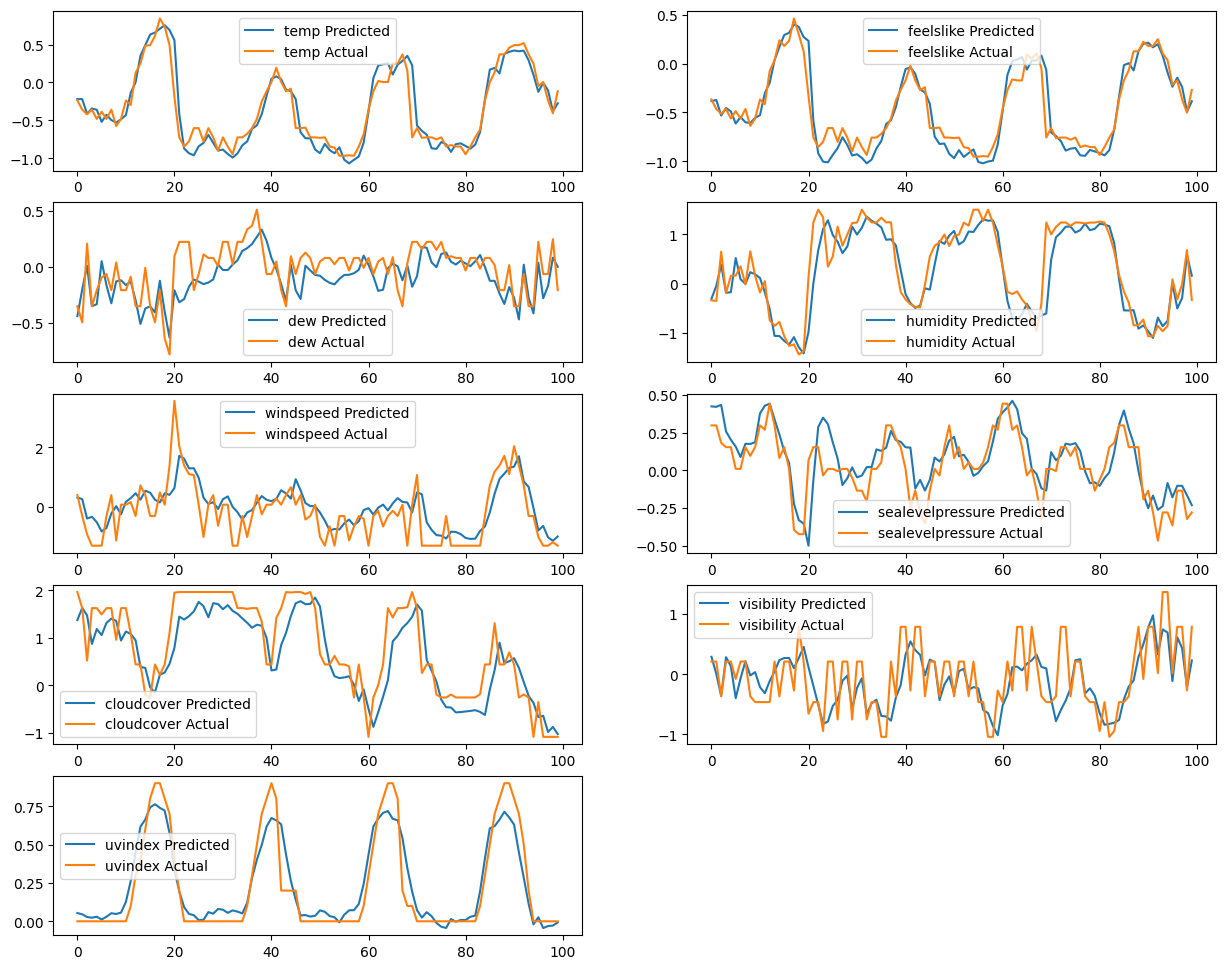

In [ ]:
plot_predictions(model , X_test , y_test, df.columns)

## Model 2

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input((5,13)),
    tf.keras.layers.Conv1D(64,3,1, padding = 'same'),
    tf.keras.layers.MaxPooling1D(strides= 1,padding = 'same'),
    tf.keras.layers.GRU(128, return_sequences = True),
    tf.keras.layers.GRU(64, return_sequences = True),
    tf.keras.layers.GRU(32, return_sequences = False),
    tf.keras.layers.Dense(16 , 'relu'),
    tf.keras.layers.Dense(9 , 'linear')
])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 5, 64)             2560      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 gru_3 (GRU)                 (None, 5, 128)            74496     
                                                                 
 gru_4 (GRU)                 (None, 5, 64)             37248     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                      

In [ ]:
model2.compile( loss = 'mse',
               optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model2.fit(X_train , y_train,
           epochs = 5,
           validation_data = (X_val , y_val))

Epoch 1/5
1188/1188 [==============================] - 31s 20ms/step - loss: 0.1843 - accuracy: 0.6544 - val_loss: 0.2007 - val_accuracy: 0.7505
Epoch 2/5
1188/1188 [==============================] - 22s 19ms/step - loss: 0.1368 - accuracy: 0.7208 - val_loss: 0.1954 - val_accuracy: 0.7540
Epoch 3/5
1188/1188 [==============================] - 21s 18ms/step - loss: 0.1278 - accuracy: 0.7309 - val_loss: 0.1986 - val_accuracy: 0.7645
Epoch 4/5
1188/1188 [==============================] - 23s 19ms/step - loss: 0.1216 - accuracy: 0.7320 - val_loss: 0.1715 - val_accuracy: 0.7585
Epoch 5/5
1188/1188 [==============================] - 23s 19ms/step - loss: 0.1191 - accuracy: 0.7423 - val_loss: 0.2035 - val_accuracy: 0.7555


99/99 [==============================] - 3s 4ms/step


,uvindex Predictions,uvindex Actuals
0,-0.029296,0.0
1,-0.049390,0.0
2,-0.019922,0.0
3,-0.014481,0.0
4,0.004600,0.0
...,...,...
95,0.016253,0.0
96,0.014375,0.0
97,-0.000731,0.0
98,0.013242,0.0


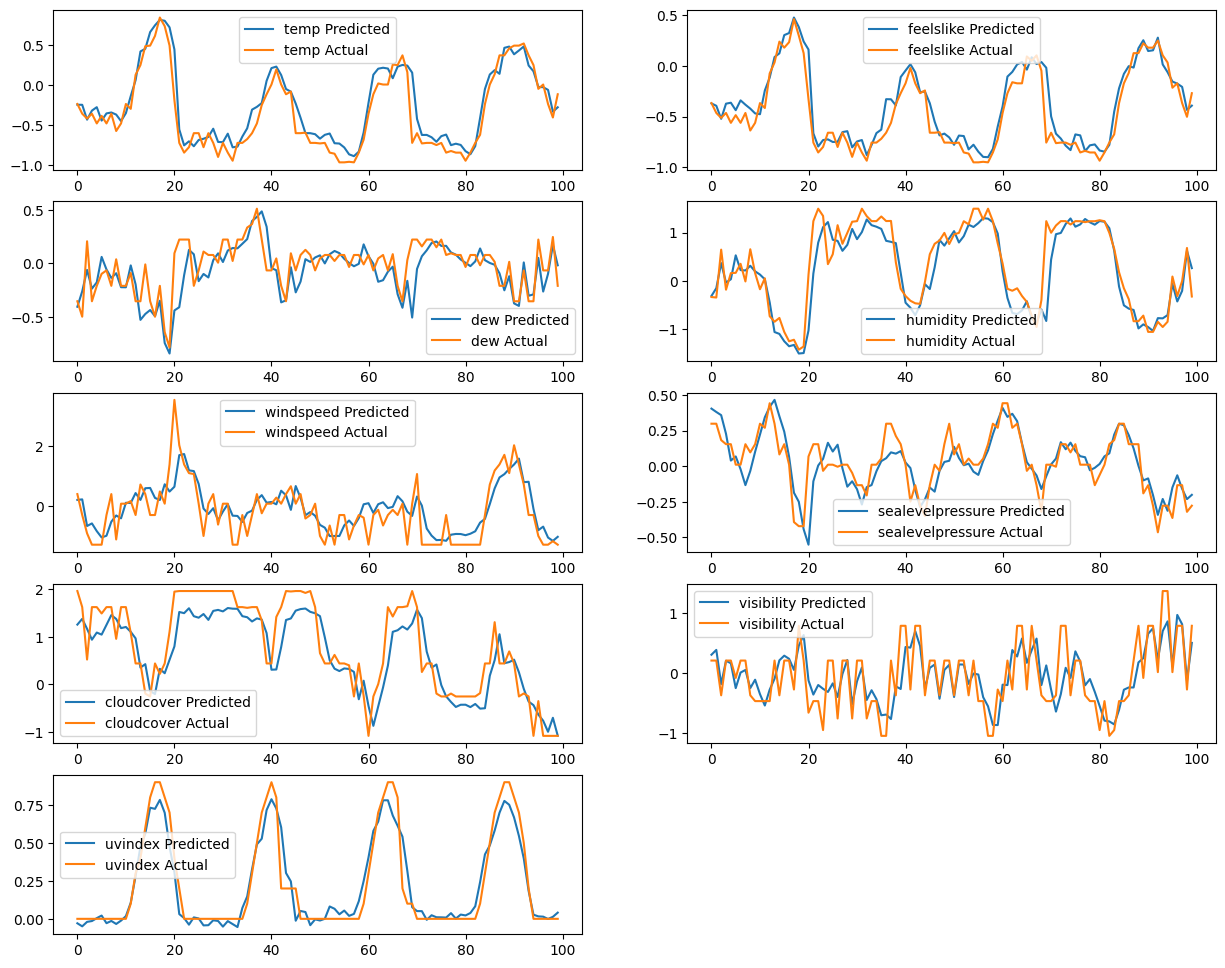

In [ ]:
plot_predictions(model2 , X_test , y_test, df.columns)

# Model3

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input((5,13)),
    tf.keras.layers.Conv1D(256,13,padding = 'same' , activation = 'relu'),
    tf.keras.layers.MaxPooling1D(strides= 1,padding = 'same'),
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.LSTM(36, return_sequences = False),
    tf.keras.layers.Dense(18 , 'relu'),
    tf.keras.layers.Dense(9 , 'linear')
])

model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 5, 256)            43520     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 5, 128)            197120    
                                                                 
 lstm_14 (LSTM)              (None, 5, 64)             49408     
                                                                 
 lstm_15 (LSTM)              (None, 36)                14544     
                                                                 
 dense_14 (Dense)            (None, 18)                666       
                                                      

In [ ]:
 model3.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
model3.fit(X_train , y_train ,
           epochs = 5,
           validation_data = (X_val , y_val))

Epoch 1/5
1188/1188 [==============================] - 46s 32ms/step - loss: 0.1902 - mean_absolute_error: 0.2630 - val_loss: 0.1932 - val_mean_absolute_error: 0.2194
Epoch 2/5
1188/1188 [==============================] - 35s 30ms/step - loss: 0.1380 - mean_absolute_error: 0.2092 - val_loss: 0.1920 - val_mean_absolute_error: 0.2131
Epoch 3/5
1188/1188 [==============================] - 37s 31ms/step - loss: 0.1302 - mean_absolute_error: 0.2000 - val_loss: 0.1903 - val_mean_absolute_error: 0.2204
Epoch 4/5
1188/1188 [==============================] - 37s 32ms/step - loss: 0.1258 - mean_absolute_error: 0.1966 - val_loss: 0.1931 - val_mean_absolute_error: 0.1995
Epoch 5/5
1188/1188 [==============================] - 44s 37ms/step - loss: 0.1231 - mean_absolute_error: 0.1925 - val_loss: 0.1804 - val_mean_absolute_error: 0.1972


99/99 [==============================] - 4s 13ms/step


,uvindex Predictions,uvindex Actuals
0,-0.028838,0.0
1,-0.027422,0.0
2,-0.021759,0.0
3,-0.024191,0.0
4,-0.010673,0.0
...,...,...
95,0.020077,0.0
96,0.004715,0.0
97,-0.015552,0.0
98,0.005565,0.0


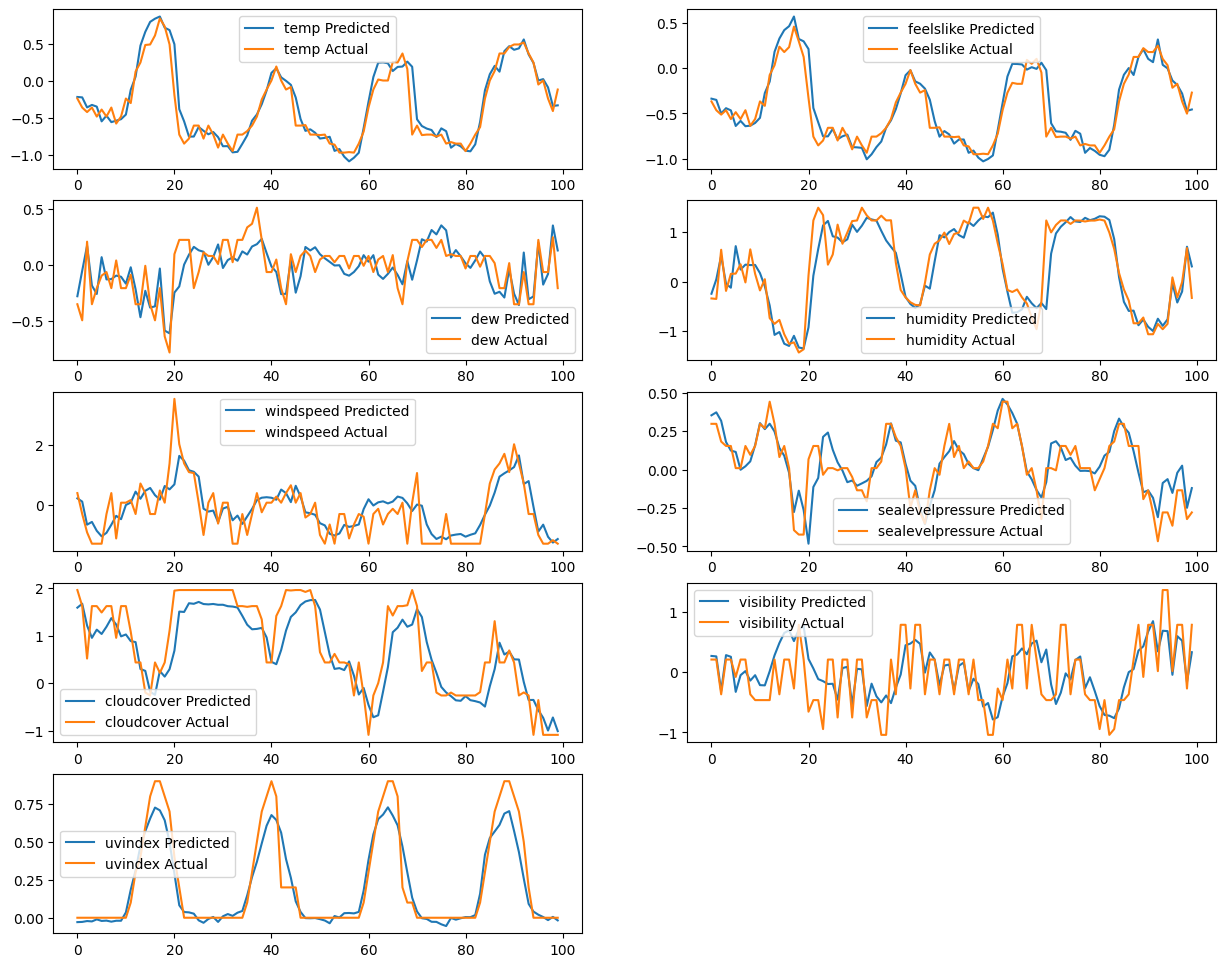

In [ ]:
plot_predictions(model3 , X_test , y_test, df.columns)

# Model for Predicting Condition

In [ ]:
 Y = pd.DataFrame({'conditions' : data['conditions']})
condition = list(Y['conditions'].unique())

In [ ]:
condition

['Partially cloudy',
 'Overcast',
 'Rain, Overcast',
 'Rain, Partially cloudy',
 'Clear',
 'Rain',
 'Rain, Fog']

In [ ]:
y1 = Y['conditions'].apply(lambda x: condition.index(x))

In [ ]:
y1 = tf.one_hot(y1, depth = 7)

In [ ]:
X_train.shape , y.shape

((38000, 5, 13), TensorShape([43152, 7]))

In [ ]:
df.head()

,temp,feelslike,dew,humidity,windspeed,sealevelpressure,cloudcover,visibility,uvindex,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,,,,,,
2018-09-05 00:00:00,0.127476,-0.075440,1.229106,1.250829,-1.303365,-0.855299,1.621473,-0.462911,0.0,-2.940619e-12,1.000000,-0.897332,-0.441357
2018-09-05 01:00:00,0.127476,-0.075440,1.229106,1.250829,-0.308495,-0.711142,1.621473,-0.462911,0.0,2.588190e-01,0.965926,-0.897648,-0.440713
2018-09-05 02:00:00,0.134216,-0.070031,1.205139,1.209436,-1.069278,-0.999456,0.953624,-0.462911,0.0,5.000000e-01,0.866025,-0.897964,-0.440070
2018-09-05 03:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,-0.855299,1.621473,-0.462911,0.0,7.071068e-01,0.707107,-0.898279,-0.439426
2018-09-05 04:00:00,0.127476,-0.075440,1.372907,1.497054,-0.308495,-0.855299,1.621473,-0.462911,0.0,8.660254e-01,0.500000,-0.898593,-0.438782


In [ ]:
X1_train ,y1_train =df[:38000], y1[:38000]
X1_val ,y1_val = df[38000:40000] ,y1[38000:40000]
X1_test ,y1_test = df[40000:] , y1[40000:]

In [ ]:
X1_train.shape

(38000, 13)

In [ ]:
model8 = tf.keras.Sequential([
    tf.keras.Input((13,1)),
    tf.keras.layers.LSTM(64 , return_sequences = True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16 , activation = 'relu'),
    tf.keras.layers.Dense(7 , activation = 'softmax')
])

model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 13, 64)            16896     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 7)                 119       
                                                                 
Total params: 29,959
Trainable params: 29,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model8.fit(X1_train , y_train,
           epochs = 10,
           validation_data = (X1_val , y1_val))

Epoch 1/10
1188/1188 [==============================] - 33s 21ms/step - loss: 0.5892 - accuracy: 0.7783 - val_loss: 0.4520 - val_accuracy: 0.8320
Epoch 2/10
1188/1188 [==============================] - 23s 20ms/step - loss: 0.3503 - accuracy: 0.8749 - val_loss: 0.1757 - val_accuracy: 0.9465
Epoch 3/10
1188/1188 [==============================] - 24s 20ms/step - loss: 0.1986 - accuracy: 0.9372 - val_loss: 0.1427 - val_accuracy: 0.9530
Epoch 4/10
1188/1188 [==============================] - 25s 21ms/step - loss: 0.1537 - accuracy: 0.9533 - val_loss: 0.1137 - val_accuracy: 0.9705
Epoch 5/10
1188/1188 [==============================] - 25s 21ms/step - loss: 0.1214 - accuracy: 0.9625 - val_loss: 0.1032 - val_accuracy: 0.9715
Epoch 6/10
1188/1188 [==============================] - 24s 21ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 0.1059 - val_accuracy: 0.9685
Epoch 7/10
1188/1188 [==============================] - 24s 20ms/step - loss: 0.0962 - accuracy: 0.9702 - val_loss: 0.0848 -

In [ ]:
model8.evaluate(X1_test , y1_test)

99/99 [==============================] - 1s 9ms/step - loss: 0.1394 - accuracy: 0.9559


[0.13940605521202087, 0.955901026725769]

In [ ]:
model8.save('/content/drive/MyDrive/Colab Notebooks/weathercon')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7c806a2e9630>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7c806a2e9630>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model3.save('/content/drive/MyDrive/Colab Notebooks/weathertimeseries')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7c8078161900>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x7c8078161900>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 953.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Succ

In [ ]:
import tensorflowjs as tfjs
import tensorflow as tf
tfjs.converters.save_keras_model(tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/weathertimeseries'), "tfjsmodel")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tfjs.converters.save_keras_model(tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/weathercon'), "/content/drive/MyDrive/Colab Notebooks/tfjsconmodel")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
tfjs.converters.save_keras_model(tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/weathertimeseries'), "/content/drive/MyDrive/Colab Notebooks/tfjsmodel")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
